In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import gc
pd.options.display.max_columns=500
os.getcwd()

'/home/jian/Projects/Big_Lots/Analysis/2019_Q4/Predictive_Model_Building/model_building'

In [2]:
df_input=pd.read_csv("./Data_tabel_with_DCM_20190831_updated_with_competitors_and_DVs_JL_2020-05-23.csv")
print(df_input.shape)
df_input.head(2)

# df_input.columns.tolist()

(577766, 450)


,Unnamed: 0,customer_id_hashed,DV_single_week_1,DV_single_week_2,DV_single_week_3,DV_single_week_4,DV_cumulative_week_updated_1,DV_cumulative_week_updated_2,DV_cumulative_week_updated_3,DV_cumulative_week_updated_4,weeks_since_sign_up,P_zip,S_zip,else_10_zip,signed_online,email_unsub_19Oct,nearest_BL_dist,total_impr,total_click,last_week_impr,last_week_click,total_sessions,total_activities,last_week_sessions,last_week_activities,total_trans_since_registration,total_items,total_sales,trans_in_store,unique_stores,trans_online,department_108_trans,department_109_trans,department_110_trans,department_111_trans,department_114_trans,department_115_trans,department_120_trans,department_130_trans,department_140_trans,department_150_trans,department_160_trans,department_170_trans,department_210_trans,department_230_trans,department_250_trans,department_270_trans,department_310_trans,department_320_trans,department_330_trans,department_340_trans,department_350_trans,department_351_trans,department_352_trans,department_353_trans,department_354_trans,department_355_trans,department_360_trans,department_361_trans,department_362_trans,department_363_trans,department_364_trans,department_365_trans,department_366_trans,department_367_trans,department_370_trans,department_410_trans,department_425_trans,department_470_trans,department_480_trans,department_510_trans,department_520_trans,department_521_trans,department_526_trans,department_530_trans,department_540_trans,department_550_trans,department_560_trans,department_608_trans,department_610_trans,department_612_trans,department_615_trans,department_710_trans,department_800_trans,week_1st_trans,purchase_channel_1st_trans,total_sales_1st_trans,total_units_1st_trans,total_units_department_108_1st_trans,total_units_department_109_1st_trans,total_units_department_110_1st_trans,total_units_department_111_1st_trans,total_units_department_114_1st_trans,total_units_department_115_1st_trans,total_units_department_120_1st_trans,total_units_department_130_1st_trans,total_units_department_140_1st_trans,total_units_department_150_1st_trans,total_units_department_160_1st_trans,total_units_department_170_1st_trans,total_units_department_210_1st_trans,total_units_department_230_1st_trans,total_units_department_250_1st_trans,total_units_department_270_1st_trans,total_units_department_310_1st_trans,total_units_department_320_1st_trans,total_units_department_330_1st_trans,total_units_department_340_1st_trans,total_units_department_350_1st_trans,total_units_department_351_1st_trans,total_units_department_352_1st_trans,total_units_department_353_1st_trans,total_units_department_354_1st_trans,total_units_department_355_1st_trans,total_units_department_360_1st_trans,total_units_department_361_1st_trans,total_units_department_362_1st_trans,total_units_department_363_1st_trans,total_units_department_364_1st_trans,total_units_department_365_1st_trans,total_units_department_366_1st_trans,total_units_department_367_1st_trans,total_units_department_370_1st_trans,total_units_department_410_1st_trans,total_units_department_425_1st_trans,total_units_department_470_1st_trans,total_units_department_480_1st_trans,total_units_department_510_1st_trans,total_units_department_520_1st_trans,total_units_department_521_1st_trans,total_units_department_526_1st_trans,total_units_department_530_1st_trans,total_units_department_540_1st_trans,total_units_department_550_1st_trans,total_units_department_560_1st_trans,total_units_department_608_1st_trans,total_units_department_610_1st_trans,total_units_department_612_1st_trans,total_units_department_615_1st_trans,total_units_department_710_1st_trans,total_units_department_800_1st_trans,week_recent_1_trans,week_counts_to_now_recent_one,label_1_recent_1_trans_also_1st,purchase_channel_1st_trans_recent_one,total_sales_recent_1_trans,total_units_recent_1_trans,total_units_department_108_1st_trans_recent_one,total_units_department_109_1st_trans_recent_one,total_units_department_110_1st_trans_rec

In [3]:
# from the iteration of col below
cols_remove_rows=['nearest_BL_dist',
                  'Consumer Goods Rental_All Other Consumer Goods Rental',
                  'Consumer Goods Rental_Consumer Electronics and Appliances Rental',
                  'Department Stores_Department Stores',
                  'Furniture Stores_Furniture Stores',
                  'Grocery Stores_Convenience Stores',
                  'Grocery Stores_Supermarkets and Other Grocery (except Convenience) Stores',
                  'Home Furnishings Stores_All Other Home Furnishings Stores',
                  'Lawn and Garden Equipment and Supplies Stores_Nursery, Garden Center, and Farm Supply Stores',
                  'Office Supplies, Stationery, and Gift Stores_Gift, Novelty, and Souvenir Stores',
                  'Other Miscellaneous Store Retailers_All Other Miscellaneous Store Retailers (except Tobacco Stores)',
                  'Other Miscellaneous Store Retailers_Pet and Pet Supplies Stores',
                  'Specialty Food Stores_All Other Specialty Food Stores',
                  'Sporting Goods, Hobby, and Musical Instrument Stores_Hobby, Toy, and Game Stores',
                  'week_recent_2_trans','total_sales_recent_2_trans','total_units_recent_2_trans']
# week_recent_2_trans: make sure to have at least 2 transactions
for col in cols_remove_rows:
    df_input=df_input[pd.notnull(df_input[col])]
    
print(df_input.shape)

(472507, 450)


In [4]:
cols_include_TBD=['email_unsub_19Oct','nearest_BL_dist']

cols_to_delete=['Unnamed: 0','customer_id_hashed','DV_single_week_1','DV_single_week_2','DV_single_week_3','DV_single_week_4',
                'customer_zip_code','week_1st_trans','week_recent_1_trans','week_recent_2_trans','week_recent_3_trans','week_recent_4_trans','week_recent_5_trans']
for col in cols_to_delete:
    del df_input[col]
    
list_col_recent_345=[x for x in df_input.columns.tolist() if ("recent_three" in x) or ("recent_3" in x) or ("recent_four" in x) or ("recent_4" in x) or ("recent_five" in x) or ("recent_5" in x)]
for col in list_col_recent_345:
    del df_input[col]
    


In [5]:
list_col_with_na=[]
for col in df_input.columns.tolist():
    df_na=df_input[pd.isnull(df_input[col])]
    if df_na.shape[0]>0:
        if ("_1st_trans" in col) or ("_2_trans" in col):
            print(col,"filled_with_na_by_0")
            df_input[col]=df_input[col].fillna(0)
        
        else:
            print(col,"with na to delete", df_na.shape[0])
            list_col_with_na.append(col)
        

total_units_department_108_1st_trans filled_with_na_by_0
total_units_department_109_1st_trans filled_with_na_by_0
total_units_department_110_1st_trans filled_with_na_by_0
total_units_department_111_1st_trans filled_with_na_by_0
total_units_department_114_1st_trans filled_with_na_by_0
total_units_department_115_1st_trans filled_with_na_by_0
total_units_department_120_1st_trans filled_with_na_by_0
total_units_department_130_1st_trans filled_with_na_by_0
total_units_department_140_1st_trans filled_with_na_by_0
total_units_department_150_1st_trans filled_with_na_by_0
total_units_department_160_1st_trans filled_with_na_by_0
total_units_department_170_1st_trans filled_with_na_by_0
total_units_department_210_1st_trans filled_with_na_by_0
total_units_department_230_1st_trans filled_with_na_by_0
total_units_department_250_1st_trans filled_with_na_by_0
total_units_department_270_1st_trans filled_with_na_by_0
total_units_department_310_1st_trans filled_with_na_by_0
total_units_department_320_1st_

total_units_department_360_recent_2_trans filled_with_na_by_0
total_units_department_361_recent_2_trans filled_with_na_by_0
total_units_department_362_recent_2_trans filled_with_na_by_0
total_units_department_363_recent_2_trans filled_with_na_by_0
total_units_department_364_recent_2_trans filled_with_na_by_0
total_units_department_365_recent_2_trans filled_with_na_by_0
total_units_department_366_recent_2_trans filled_with_na_by_0
total_units_department_367_recent_2_trans filled_with_na_by_0
total_units_department_370_recent_2_trans filled_with_na_by_0
total_units_department_410_recent_2_trans filled_with_na_by_0
total_units_department_425_recent_2_trans filled_with_na_by_0
total_units_department_470_recent_2_trans filled_with_na_by_0
total_units_department_480_recent_2_trans filled_with_na_by_0
total_units_department_510_recent_2_trans filled_with_na_by_0
total_units_department_520_recent_2_trans filled_with_na_by_0
total_units_department_521_recent_2_trans filled_with_na_by_0
total_un

In [6]:
df_input.shape

(472507, 263)

# Build Model

In [38]:
# f1 & confusion matrics -- https://en.wikipedia.org/wiki/F1_score
# solvers --  https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451
# psuedo r2 -- https://datascience.oneoffcoder.com/psuedo-r-squared-logistic-regression.html
# id selection -- https://www.kaggle.com/residentmario/automated-feature-selection-with-sklearn
# sklearn feature selection for Log_R -- https://towardsdatascience.com/a-look-into-feature-importance-in-logistic-regression-models-a4aa970f9b0f
# p values for sklearn -- https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import scale
from sklearn.feature_selection import VarianceThreshold

from sklearn import metrics
import matplotlib.pyplot as plt
import sklearn


print(sklearn.__version__)

0.23.1


In [40]:
col_needed_X=[x for x in df_input.columns.tolist() if x[:3]!="DV_"]
col_needed_Y=[x for x in df_input.columns.tolist() if x[:3]=="DV_"]
# 
df_X=df_input[col_needed_X]
df_Y=df_input[col_needed_Y]

list_cols_X=df_X.columns.tolist()

In [41]:
r=0.98 # ivs with >= r same values will be removed
threshold_variance_iv=r*(1-r)
sel = VarianceThreshold(threshold=threshold_variance_iv)
df_X_reduced=sel.fit_transform(df_X)
print(df_X_reduced.shape)
del df_X_reduced

(472507, 205)


In [42]:
# reduced 

indices = [i for i, x in enumerate(list(sel.get_support())) if x == True]
list_cols_X_r=df_X.iloc[1:,indices].columns.tolist()

df_X=df_X.iloc[:,indices]
df_X.shape

(472507, 205)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.25, random_state=42)

X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)


In [44]:
print("X_train_scaled.shape",X_train_scaled.shape)
print("X_test_scaled.shape",X_test_scaled.shape)

X_train_scaled.shape (354380, 205)
X_test_scaled.shape (118127, 205)


In [45]:
y_train.head(2)

,DV_cumulative_week_updated_1,DV_cumulative_week_updated_2,DV_cumulative_week_updated_3,DV_cumulative_week_updated_4
87111,1,1,1,1
297919,1,1,1,1


In [46]:
for col in col_needed_Y:
    print("blind pred:",col,df_input[df_input[col]==0].shape[0]/df_input.shape[0])

blind pred: DV_cumulative_week_updated_1 0.9097431360805237
blind pred: DV_cumulative_week_updated_2 0.8438266523035638
blind pred: DV_cumulative_week_updated_3 0.7889364602005896
blind pred: DV_cumulative_week_updated_4 0.7310452543560201


In [47]:
def generate_step_table_of_test_mode(model,x_test_input,y_test_input,threshold_list = [(x+1)/100 for x in range(0,100)]):
    y_test_true = y_test_input
    list_prob=[x[0] for x in model.predict_proba(x_test_input)]
    df_output=pd.DataFrame()
    for i in threshold_list:
        y_test_pred=[1 if x<=i else 0 for x in list_prob]

        accuracy_score = metrics.accuracy_score(y_test_true,y_test_pred)    
        tn, fp, fn, tp = metrics.confusion_matrix(y_test_true, y_test_pred).ravel()
        # 
        TPR=tp/(tp+fn) #recall
        FNR=fn/(tp+fn)
        FPR=fp/(fp+tn)
        TNR=tn/(fp+tn)

        PPV=tp/(tp+fp) #precission
        f1_score = 2*(TPR*PPV)/(TPR+PPV)

        df=pd.DataFrame({"predicted_positive":len([x for x in y_test_pred if x==1]),
                         "predicted_negative":len([x for x in y_test_pred if x==0]),
                         "accuracy_score":accuracy_score,
                         'true_negative':tn,
                         'false_positive_(Type1_Error)':fp,
                         'fale_negative_(Type2_Error)':fn,
                         'true_positive':tp,
                         'true_positive_rate':TPR,
                         'false_negative_rate':FNR,
                         'false_positive_rate':FPR,
                         'true_negative_rate':TNR,
                         'precission_(Positive predictive value)':PPV,
                         'f1_score':f1_score
                        },index=[i])
        df_output=df_output.append(df)
    return df_output

In [48]:
def run_p_values(model,input_x,input_y):
    from scipy import stats
    # https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
    params = np.append(model.intercept_,model.coef_)
    predictions = model.predict(input_x)

    newX = pd.DataFrame({"Constant":np.ones(len(input_x))}).join(pd.DataFrame(input_x))
    MSE = (sum((input_y-predictions)**2))/(len(newX)-len(newX.columns))

    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,3)
    params = np.round(params,4)

    df_output_p = pd.DataFrame()
    df_output_p["Coefficients"],df_output_p["Standard Errors"],df_output_p["t values"],df_output_p["Probabilities"] = [params,sd_b,ts_b,p_values]
    return df_output_p


In [49]:
def run_log_regression_model(input_x_train,input_y_train_df,input_x_test,input_y_test_df,n_week,solver="saga",C=1,penalty="l1"):
    # n_week 1-4
    # solver and penalty: https://scikit-learn.org/stable/modules/linear_model.html
    # solver: [‘liblinear’,‘lbfgs’,‘newton-cg’,‘sag’,‘saga’]
    
    input_y_train= input_y_train_df.iloc[:,n_week-1].values
    input_y_test= input_y_test_df.iloc[:,n_week-1].values
    
    selector = SelectFromModel(estimator=LogisticRegression()).fit(input_x_train, input_y_train)
    
    print("selector.threshold_",selector.threshold_)
    list_support_boolean=selector.get_support()
    
    x_train_selected=selector.transform(input_x_train)
    x_test_selected=selector.transform(input_x_test)
    
    list_selected_features= [i for i, x in enumerate(list_support_boolean) if x == True]
    list_selected_features= [list_cols_X_r[i] for i in list_selected_features]
    print("len(list_selected_features)",len(list_selected_features))

    mod_log_r=LogisticRegression(random_state=0,solver=solver,C=C,penalty='l1').fit(x_train_selected,input_y_train)
    
    df_p_value=run_p_values(model=mod_log_r,input_x=x_train_selected,input_y=input_y_train)
    
    df_step_table=generate_step_table_of_test_mode(model=mod_log_r,x_test_input=x_test_selected,y_test_input=input_y_test)

    df_coefficient=pd.DataFrame({"coefficient":mod_log_r.coef_[0]},index=list_selected_features).reset_index().rename(columns={"index":"IVs"})
    df_intercept=pd.DataFrame({"coefficient":list(mod_log_r.intercept_)},index=['intercept']).reset_index().rename(columns={"index":"IVs"})
    df_coefficient=df_intercept.append(df_coefficient)
    
    # plot the ROC 
    metrics.plot_roc_curve(mod_log_r, x_test_selected, input_y_test)
    plt.show()
    
    df_coefficient=df_coefficient.reset_index()
    del df_coefficient['index']
    df_p_value=df_p_value.reset_index()
    del df_p_value['index']
    df_coefficient=pd.concat([df_coefficient,df_p_value],axis=1)

    list_y_train_pred=mod_log_r.predict(x_train_selected)
    
    return mod_log_r,df_step_table,df_coefficient,list_y_train_pred
    
    
    

selector.threshold_ 0.01637290817665411
len(list_selected_features) 45


/home/jian/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


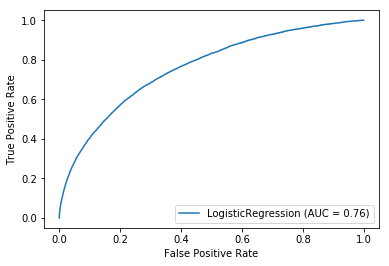

In [50]:
model_1,mod_1_step_tables,mod_1_coefficient_df,mode_1_list_y_train_pred=run_log_regression_model(input_x_train=X_train_scaled,
                             input_y_train_df=y_train,
                             input_x_test=X_test_scaled,
                             input_y_test_df=y_test,
                             n_week=1)

selector.threshold_ 0.01632370495897705
len(list_selected_features) 42


/home/jian/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


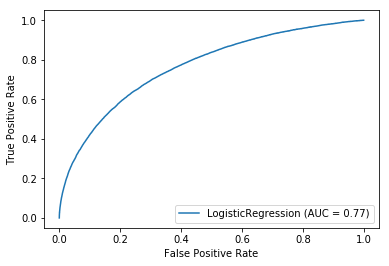

In [51]:
model_2,mod_2_step_tables,mod_2_coefficient_df,mode_2_list_y_train_pred=run_log_regression_model(input_x_train=X_train_scaled,
                             input_y_train_df=y_train,
                             input_x_test=X_test_scaled,
                             input_y_test_df=y_test,
                             n_week=2)

selector.threshold_ 0.017161860810164475
len(list_selected_features) 41


/home/jian/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jian/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


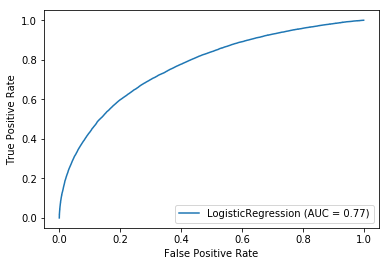

In [52]:
model_3,mod_3_step_tables,mod_3_coefficient_df,mode_3_list_y_train_pred=run_log_regression_model(input_x_train=X_train_scaled,
                             input_y_train_df=y_train,
                             input_x_test=X_test_scaled,
                             input_y_test_df=y_test,
                             n_week=3)

selector.threshold_ 0.018497978715568082
len(list_selected_features) 44


/home/jian/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


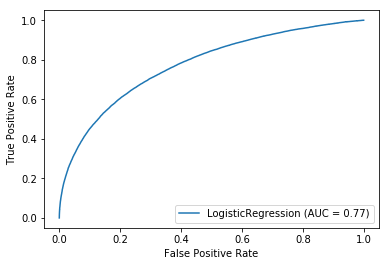

In [53]:
model_4,mod_4_step_tables,mod_4_coefficient_df,mode_4_list_y_train_pred=run_log_regression_model(input_x_train=X_train_scaled,
                             input_y_train_df=y_train,
                             input_x_test=X_test_scaled,
                             input_y_test_df=y_test,
                             n_week=4)

In [54]:
# Efron’s 𝑅2
def efron_rsquare(y, y_pred):
    n = float(len(y))
    t1 = np.sum(np.power(y - y_pred, 2.0))
    t2 = np.sum(np.power((y - (np.sum(y) / n)), 2.0))
    return 1.0 - (t1 / t2)

# fun for the mcfadeen r2
def full_log_likelihood(w, X, y):
    score = np.dot(X, w).reshape(1, X.shape[0])
    return np.sum(-np.log(1 + np.exp(score))) + np.sum(y * score)

def null_log_likelihood(w, X, y):
    z = np.array([w if i == 0 else 0.0 for i, w in enumerate(w.reshape(1, X.shape[1])[0])]).reshape(X.shape[1], 1)
    score = np.dot(X, z).reshape(1, X.shape[0])
    return np.sum(-np.log(1 + np.exp(score))) + np.sum(y * score)

# McFadden’s 𝑅2
def mcfadden_rsquare(w, X, y):
    return 1.0 - (full_log_likelihood(w, X, y) / null_log_likelihood(w, X, y))
# McFadden’s Adjusted 𝑅2
def mcfadden_adjusted_rsquare(w, X, y):
    k = float(X.shape[1])
    return 1.0 - ((full_log_likelihood(w, X, y) - k) / null_log_likelihood(w, X, y))

# McKelvey & Zavoina 𝑅2
def mz_rsquare(y_pred):
    return np.var(y_pred) / (np.var(y_pred) + (np.power(np.pi, 2.0) / 3.0) )

# Count 𝑅2
def get_num_correct(y, y_pred, t=0.5):
    y_correct = np.array([0.0 if p < t else 1.0 for p in y_pred])
    return sum([1.0 for p, p_pred in zip(y, y_correct) if p == p_pred])

def count_rsquare(y, y_pred, t=0.5):
    n = float(len(y))
    num_correct = get_num_correct(y, y_pred, t)
    return num_correct / n

# Adjust count 𝑅2
def get_count_most_freq_outcome(y):
    num_0 = 0
    num_1 = 0
    for p in y:
        if p == 1.0:
            num_1 += 1
        else:
            num_0 += 1
    return float(max(num_0, num_1))

def count_adjusted_rsquare(y, y_pred, t=0.5):
    correct = get_num_correct(y, y_pred, t)
    total = float(len(y))
    n = get_count_most_freq_outcome(y)
    return (correct - n) / (total - n)

In [56]:
model_4

LogisticRegression(C=1, penalty='l1', random_state=0, solver='saga')

In [57]:
writer=pd.ExcelWriter("./result_Model_with_DCM_JL_"+str(datetime.datetime.now().date())+".xlsx",engine="xlsxwriter")

mod_1_coefficient_df.to_excel(writer,"mod_1_output")
mod_1_step_tables.to_excel(writer,"step_table_DV1")

mod_2_coefficient_df.to_excel(writer,"mod_2_output")
mod_2_step_tables.to_excel(writer,"step_table_DV2")

mod_3_coefficient_df.to_excel(writer,"mod_3_output")
mod_3_step_tables.to_excel(writer,"step_table_DV3")

mod_4_coefficient_df.to_excel(writer,"mod_4_output")
mod_4_step_tables.to_excel(writer,"step_table_DV4")

writer.save()

In [60]:
model_folder="./modles_saved/"

try:
    os.stat(model_folder)
except:
    os.mkdir(model_folder)
    
    
from joblib import dump
dump(model_1, model_folder+'model_1_with_DCM_20190831.joblib')
dump(model_2, model_folder+'model_2_with_DCM_20190831.joblib')
dump(model_3, model_folder+'model_3_with_DCM_20190831.joblib')
dump(model_4, model_folder+'model_4_with_DCM_20190831.joblib')


['./modles_saved/model_4_with_DCM_20190831.joblib']